In [68]:
# Importación de librerías
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.neighbors import KNeighborsRegressor
import seaborn as sns

sns.set_context('talk')

In [69]:
# Carga de datos desde la URL proporcionada
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv'
)

# Selección de columnas de interés
selected_cols = [
    'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
    'BuildingArea', 'YearBuilt', 'Distance', 'Type',
    'Price', 'Suburb', 'Postcode'
]

In [70]:
melb_pd_df = melb_df[selected_cols].copy()
print("Registros originales:", len(melb_pd_df))

# Eliminamos registro con Rooms = 10
melb_filtered_1 = melb_pd_df[melb_pd_df['Rooms'] != 10]
print("1:", len(melb_filtered_1))

# Eliminamos columna Bedroom2
melb_filtered_2 = melb_filtered_1.drop("Bedroom2", axis=1)
print("2:", len(melb_filtered_2))

# Eliminamos los registros con más baños que habitaciones
melb_filtered_3 = melb_filtered_2[melb_filtered_2['Bathroom'] <= melb_filtered_2['Rooms']]
print("3:", len(melb_filtered_3))

# Eliminamos los que tienen Landsize mayor a 400000
melb_filtered_4 = melb_filtered_3[melb_filtered_3['Landsize'] < 10000]
print("4:", len(melb_filtered_4))

# Eliminamos los que tienen Landsize menor a BuildingArea
melb_filtered_5 = melb_filtered_4[~(melb_filtered_4['Landsize'] < melb_filtered_4['BuildingArea'])]
print("5:", len(melb_filtered_5))

# Descartamos las propiedades con años de construcción anterior a 1800
melb_filtered_6 = melb_filtered_5[(melb_filtered_5['YearBuilt'] > 1800) | (melb_filtered_5['YearBuilt'].isna())]
print("6:", len(melb_filtered_6))

# Descartamos las propiedades con precios mayores a $5.000.000
melb_filtered_7 = melb_filtered_6[(melb_filtered_6['Price'] < 5E6)]
print("7:", len(melb_filtered_7))

# Transformo los ceros de Bathroom, Landsize, BuildingArea en NaN
melb_filtered_8 = melb_filtered_7.copy(deep=True)
melb_filtered_8.loc[melb_filtered_8.Bathroom==0,'Bathroom']=pd.NA
melb_filtered_8.loc[melb_filtered_8.Landsize==0,'Landsize']=pd.NA
melb_filtered_8.loc[melb_filtered_8.BuildingArea==0,'BuildingArea']=pd.NA

Registros originales: 13580
1: 13579
2: 13579
3: 13551
4: 13525
5: 12205
6: 12204
7: 12183


## Ejercicio 1: Encoding

1. Seleccionar todas las filas y columnas del conjunto de datos, **excepto** `BuildingArea` y `YearBuilt`.

2. Aplicar una codificación One-hot encoding a cada fila, para las variables categóricas. Si lo consideran necesario, pueden volver a reducir el número de categorías únicas.

Algunas opciones:
  1. Utilizar `OneHotEncoder` junto con el parámetro `categories` para las variables categóricas y luego usar `numpy.hstack` para concatenar el resultado con las variables numéricas.
  2. `DictVectorizer` con algunos pasos de pre-proceso previo.

Recordar también que el atributo `pandas.DataFrame.values` permite acceder a la matriz de numpy subyacente a un DataFrame.


In [71]:
# Datos Melbourne por DanB
melb_df = pd.read_csv(
    'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/melb_data.csv')

selected_cols = [
    'Rooms', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
    'BuildingArea', 'YearBuilt', 'Distance',  'Type', 'Price', 'Suburb'
]

melb_pd_df = melb_df[selected_cols].copy()
print(len(melb_pd_df))

# Eliminamos registro con Rooms = 10
melb_filtered_1 = melb_pd_df[melb_pd_df['Rooms'] != 10]
print("1:", len(melb_filtered_1))

# Eliminamos columna Bedroom2
melb_filtered_2 = melb_filtered_1.drop("Bedroom2", axis=1)
print("2:", len(melb_filtered_2))

# Eliminamos los registros con más baños que habitaciones
melb_filtered_3 = melb_filtered_2[melb_filtered_2['Bathroom'] <= melb_filtered_2['Rooms']]
print("3:", len(melb_filtered_3))

# Eliminamos los que tienen Landsize mayor a 10000
melb_filtered_4 = melb_filtered_3[melb_filtered_3['Landsize'] < 10000]
print("4:", len(melb_filtered_4))

# Eliminamos los que tienen Landsize menor a BuildingArea
melb_filtered_5 = melb_filtered_4[~(melb_filtered_4['Landsize'] < melb_filtered_4['BuildingArea'])]
print("5:", len(melb_filtered_5))

# Descartamos las propiedades con años de construcción anterior a 1800
melb_filtered_6 = melb_filtered_5[(melb_filtered_5['YearBuilt'] > 1800) | (melb_filtered_5['YearBuilt'].isna())]
print("6:", len(melb_filtered_6))

# Descartamos las propiedades con precios mayores a $5.000.000
melb_filtered_7 = melb_filtered_6[(melb_filtered_6['Price'] < 5E6)]
print("7:", len(melb_filtered_7))

# Transformo los ceros de Bathroom, Landsize, BuildingArea en NaN
melb_filtered_8 = melb_filtered_7.copy(deep=True)
melb_filtered_8.loc[melb_filtered_8.Bathroom==0,'Bathroom']=pd.NA
melb_filtered_8.loc[melb_filtered_8.Landsize==0,'Landsize']=pd.NA
melb_filtered_8.loc[melb_filtered_8.BuildingArea==0,'BuildingArea']=pd.NA

13580
1: 13579
2: 13579
3: 13551
4: 13525
5: 12205
6: 12204
7: 12183


In [72]:
print(melb_filtered_8.columns)
print(melb_filtered_8.describe())

Index(['Rooms', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt',
       'Distance', 'Type', 'Price', 'Suburb'],
      dtype='object')
              Rooms      Bathroom           Car      Landsize  BuildingArea  \
count  12183.000000  12149.000000  12127.000000  11308.000000   5750.000000   
mean       3.022244      1.549099      1.654985    566.284489    152.554123   
std        0.927736      0.681737      0.980027    568.054316     78.588845   
min        1.000000      1.000000      0.000000      1.000000      1.000000   
25%        2.000000      1.000000      1.000000    280.000000    104.000000   
50%        3.000000      1.000000      2.000000    537.000000    134.000000   
75%        4.000000      2.000000      2.000000    677.000000    182.000000   
max        8.000000      8.000000     10.000000   9838.000000    792.000000   

         YearBuilt      Distance         Price  
count  6904.000000  12183.000000  1.218300e+04  
mean   1962.611095     10.544406  1.103312e+0

In [73]:
print(melb_filtered_8[:5])

   Rooms  Bathroom  Car  Landsize  BuildingArea  YearBuilt  Distance Type  \
0      2       1.0  1.0     202.0           NaN        NaN       2.5    h   
1      2       1.0  0.0     156.0          79.0     1900.0       2.5    h   
3      3       2.0  1.0      94.0           NaN        NaN       2.5    h   
5      2       1.0  0.0     181.0           NaN        NaN       2.5    h   
6      3       2.0  0.0     245.0         210.0     1910.0       2.5    h   

       Price      Suburb  
0  1480000.0  Abbotsford  
1  1035000.0  Abbotsford  
3   850000.0  Abbotsford  
5   941000.0  Abbotsford  
6  1876000.0  Abbotsford  


In [74]:
print(melb_filtered_8.values[:5])

[[2 1.0 1.0 202.0 nan nan 2.5 'h' 1480000.0 'Abbotsford']
 [2 1.0 0.0 156.0 79.0 1900.0 2.5 'h' 1035000.0 'Abbotsford']
 [3 2.0 1.0 94.0 nan nan 2.5 'h' 850000.0 'Abbotsford']
 [2 1.0 0.0 181.0 nan nan 2.5 'h' 941000.0 'Abbotsford']
 [3 2.0 0.0 245.0 210.0 1910.0 2.5 'h' 1876000.0 'Abbotsford']]


In [75]:
# Contar la cantidad de categorías únicas
print("Cantidad de valores únicos en Type:", melb_filtered_8['Type'].nunique())
print("Cantidad de valores únicos en Suburb:", melb_filtered_8['Suburb'].nunique())

# Ver cuántas veces aparece cada valor
print("\nFrecuencia de cada valor en Type:")
print(melb_filtered_8['Type'].value_counts())

print("\nFrecuencia de los 10 suburbios más frecuentes:")
print(melb_filtered_8['Suburb'].value_counts().head(10))

Cantidad de valores únicos en Type: 3
Cantidad de valores únicos en Suburb: 311

Frecuencia de cada valor en Type:
Type
h    9164
u    2083
t     936
Name: count, dtype: int64

Frecuencia de los 10 suburbios más frecuentes:
Suburb
Reservoir         341
Bentleigh East    241
Preston           230
Richmond          198
Essendon          193
Brunswick         189
Glen Iris         182
Northcote         177
Coburg            169
Balwyn North      168
Name: count, dtype: int64


In [76]:
# Agrupar suburbios menos frecuentes en "Otros"
top_suburbs = melb_filtered_8['Suburb'].value_counts().nlargest(20).index
melb_filtered_8['Suburb_reduced'] = melb_filtered_8['Suburb'].where(melb_filtered_8['Suburb'].isin(top_suburbs), 'Otros')

from sklearn.preprocessing import OneHotEncoder
import numpy as np

categorical_cols = ['Type', 'Suburb_reduced']
numerical_cols = ['Rooms', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Price']

X_cat = melb_filtered_8[categorical_cols].astype(str)
X_num = melb_filtered_8[numerical_cols].values

encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_cat_encoded = encoder.fit_transform(X_cat)

X_final = np.hstack([X_cat_encoded, X_num])
print("Forma de la matriz final:", X_final.shape)

Forma de la matriz final: (12183, 30)


## Ejercicio 2: Imputación por KNN

En el teórico se presentó el método `IterativeImputer` para imputar valores faltantes en variables numéricas. Sin embargo, los ejemplos presentados sólo utilizaban algunas variables numéricas presentes en el conjunto de datos. En este ejercicio, utilizaremos la matriz de datos codificada para imputar datos faltantes de manera más precisa.

1. Agregue a la matriz obtenida en el punto anterior las columnas `YearBuilt` y `BuildingArea`.
2. Aplique una instancia de `IterativeImputer` con un estimador `KNeighborsRegressor` para imputar los valores de las variables. ¿Es necesario estandarizar o escalar los datos previamente?
3. Realice un gráfico mostrando la distribución de cada variable antes de ser imputada, y con ambos métodos de imputación.


## 1)
#### Agregamos las columnas faltantes a la matriz obtenida en el punto anterior

Agregamos las columnas `YearBuilt` y `BuildingArea`, que contienen valores faltantes, a la matriz que ya contiene variables numéricas y categóricas codificadas.

También construimos una lista con los nombres de todas las columnas que formarán parte del conjunto final a imputar.

In [77]:
# Agregamos las columnas faltantes
columns_to_impute = melb_filtered_8[['YearBuilt', 'BuildingArea']]

# Construimos la matriz completa
X_full = np.hstack([X_final, columns_to_impute.values])

# Obtener nombres de columnas codificadas
encoded_cat_names = encoder.get_feature_names_out(categorical_cols).tolist()

# Nombres de columnas numéricas
numerical_cols = ['Rooms', 'Bathroom', 'Car', 'Landsize', 'Distance', 'Price']

# Nombres de columnas a imputar
impute_cols = ['YearBuilt', 'BuildingArea']

# Concatenar todo
all_columns = encoded_cat_names + numerical_cols + impute_cols

X_full contiene:
- Las variables categóricas ya codificadas (OneHotEncoder).
- Las variables numéricas originales.
- Las variables a imputar: `YearBuilt` y `BuildingArea`.

all_columns es una lista de strings con los nombres de las columnas, en el mismo orden que aparecen en X_full.

## 2)
#### a. Escalar previamente a imputar con KNN

Es recomendable escalar cuando se usa `KNeighborsRegressor`, porque este algoritmo se basa en distancias.  
Si no se escala, las columnas con valores grandes (por ejemplo, `Price`) dominan la métrica de distancia.


In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X_full)

In [79]:
X_scaled

array([[ 1.        , -1.        , -1.        , ..., -0.41448059,
                nan,         nan],
       [ 1.        , -1.        , -1.        , ..., -0.60125918,
        -0.2513369 , -0.80278129],
       [ 1.        , -1.        , -1.        , ..., -0.67890871,
                nan,         nan],
       ...,
       [ 1.        , -1.        , -1.        , ..., -0.54459601,
         0.78609626,         nan],
       [ 1.        , -1.        , -1.        , ...,  0.01364113,
        -0.03743316, -0.60556258],
       [ 1.        , -1.        , -1.        , ..., -0.49632739,
        -0.03743316, -0.7193426 ]])

#### b. Imputamos con el estimador KNN

Usamos `IterativeImputer` con `KNeighborsRegressor` como estimador base.  
El número de vecinos (`n_neighbors`) y de iteraciones (`max_iter`) puede ajustarse según el poder de cómputo y precisión deseada.

In [80]:
imputer = IterativeImputer(
    estimator=KNeighborsRegressor(n_neighbors=1), 
    max_iter=1,
    random_state=42
)

X_imputed = imputer.fit_transform(X_scaled)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\impute\_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


El `ConvergenceWarning` indica que la imputación no se estabilizó en el número de iteraciones definido.

#### c. Recuperar la escala original

Después de imputar, desescalamos los datos para obtener los valores en su escala real.
También verificamos que las dimensiones de la matriz imputada coincidan con las esperadas.

In [81]:
X_imputed_unscaled = scaler.inverse_transform(X_imputed)

print("Cantidad de columnas antes de imputación:", len(all_columns))
print("Shape antes de imputación:", X_full.shape)
print("Shape después de imputación:", X_imputed_unscaled.shape)

Cantidad de columnas antes de imputación: 32
Shape antes de imputación: (12183, 32)
Shape después de imputación: (12183, 32)


La cantidad de columnas antes y después debería ser la misma. Si no coincide, puede ser por eliminación automática de columnas constantes o errores durante la imputación. Para evitar errores y generalizar, generamos una lista de nombres ajustada a la cantidad final de columnas.

In [82]:
# Nombres de columnas finales
corrected_columns = all_columns[:X_imputed_unscaled.shape[1]]

# Crear el DataFrame final imputado
imputed_df = pd.DataFrame(X_imputed_unscaled, columns=corrected_columns)

## 3)
#### Comparar la distribución antes y después de imputar

Extraemos las columnas `YearBuilt` y `BuildingArea` del DataFrame original (con nulos) y del imputado (sin nulos) para comparar su distribución.


In [83]:
original = melb_filtered_8[['YearBuilt', 'BuildingArea']]
imputed_vars = imputed_df[['YearBuilt', 'BuildingArea']]

Graficamos histogramas para visualizar cómo se modificó la distribución de los datos tras la imputación.


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

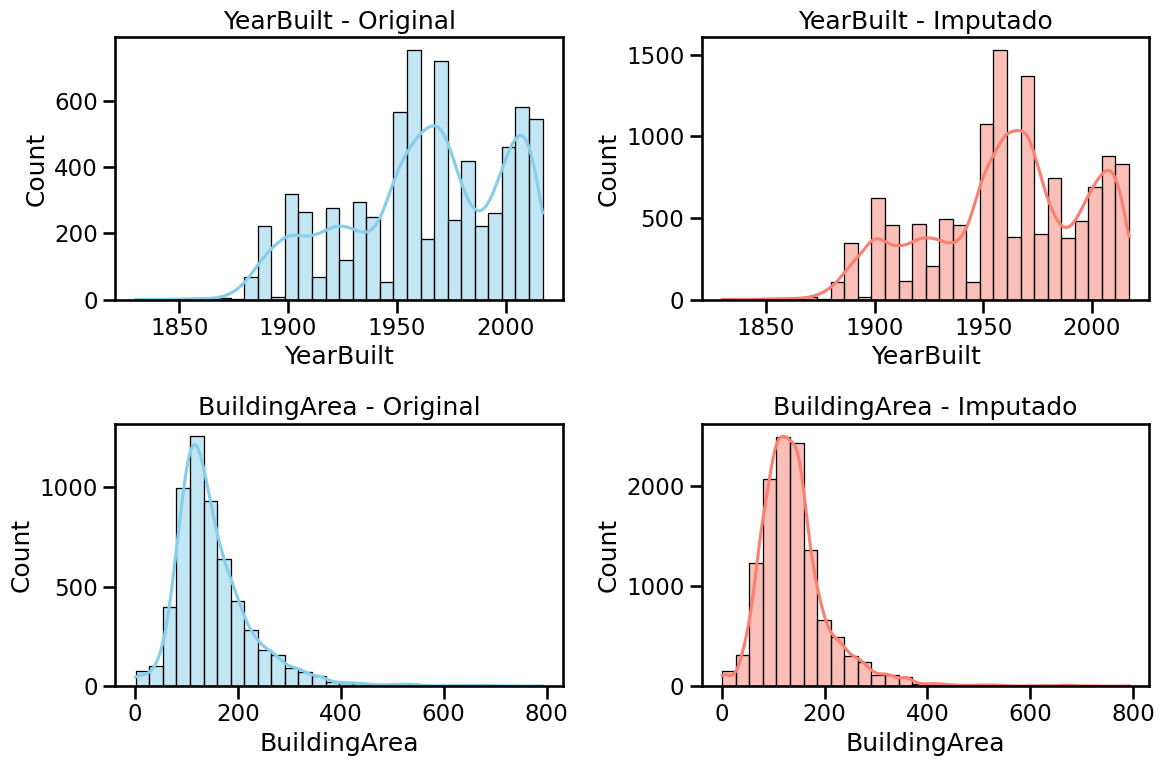

In [84]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

for i, col in enumerate(['YearBuilt', 'BuildingArea']):
    sns.histplot(original[col], bins=30, kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'{col} - Original')
    
    sns.histplot(imputed_vars[col], bins=30, kde=True, ax=axes[i][1], color='salmon')
    axes[i][1].set_title(f'{col} - Imputado')

plt.tight_layout()
plt.show()

En los gráficos correspondientes a la variable `YearBuilt`, se observa que la imputación mantuvo la estructura general de la distribución original. La forma multimodal, con picos en torno a 1950-1980 y cerca del 2000, se conserva después del proceso, lo que indica que el modelo de imputación fue capaz de respetar los patrones históricos. La diferencia más evidente es un aumento en la densidad de los modos principales, resultado de haber completado los valores faltantes. No se generaron valores atípicos ni cambios abruptos, lo que sugiere que la imputación fue realista y coherente.

En cuanto a la variable `BuildingArea`, la distribución original presenta una fuerte asimetría positiva, concentrando la mayoría de los valores entre 50 y 200 m², con una larga cola hacia la derecha. Tras la imputación, esta forma se conserva y los valores imputados se ubican, en su mayoría, dentro del rango más frecuente. El modelo no introdujo valores fuera de escala ni distorsionó la tendencia general, lo cual refuerza la validez del enfoque utilizado.

En ambos casos, el incremento en la altura de las curvas tras la imputación simplemente refleja una mayor cantidad de datos disponibles, y no un cambio en la forma relativa de las distribuciones. Esto indica que el método aplicado logró completar los datos sin alterar la naturaleza de las variables originales. En resumen, la imputación fue exitosa y no introdujo sesgos ni irregularidades notorias en las distribuciones.

## Ejercicio 3: Reducción de dimensionalidad.

Utilizando la matriz obtenida en el ejercicio anterior:
1. Aplique `PCA` para obtener $n$ componentes principales de la matriz, donde `n = min(20, X.shape[0])`. ¿Es necesario estandarizar o escalar los datos?
2. Seleccione las primeras $2$ columnas de la matriz transformada para agregar como nuevas características al conjunto de datos. Realizar un gráfico de la componente principal 1 vs la componente principal 2 (pca1-pca2).
3. Transformar nuevamente el conjunto de datos procesado en un `pandas.DataFrame` y guardarlo en un archivo.

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


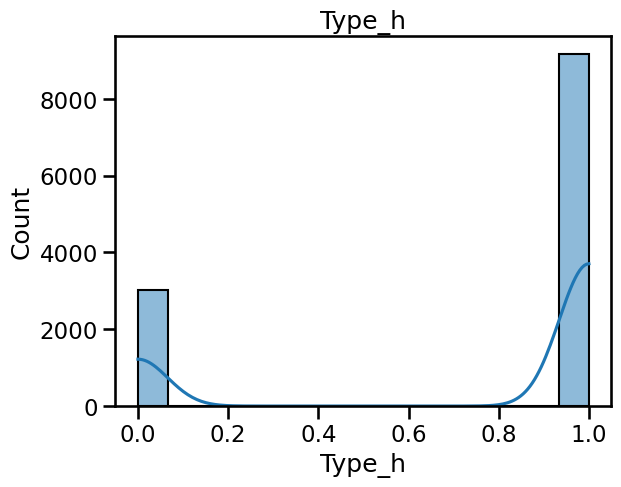

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


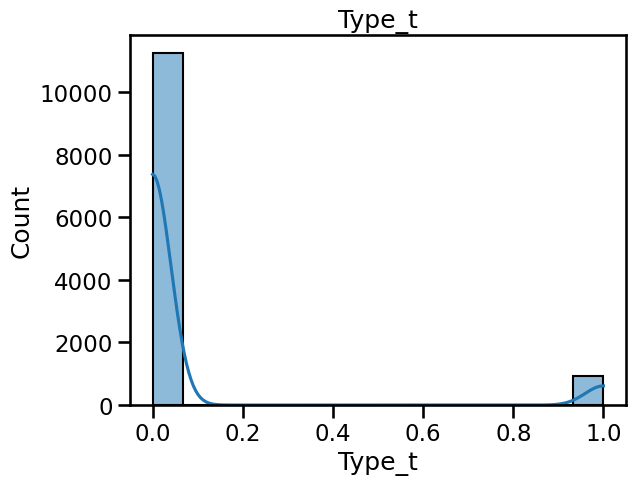

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


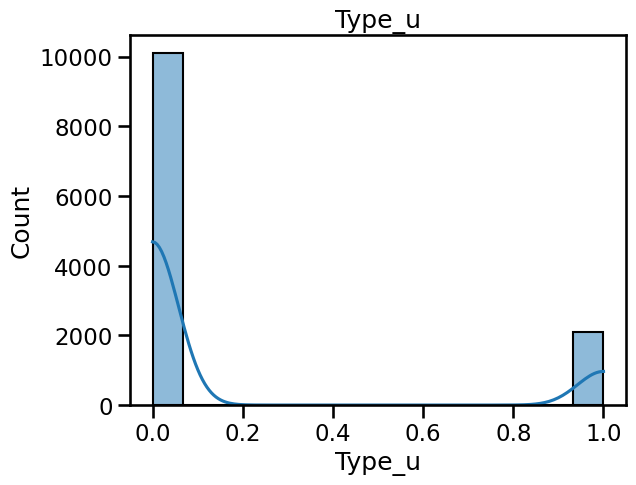

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


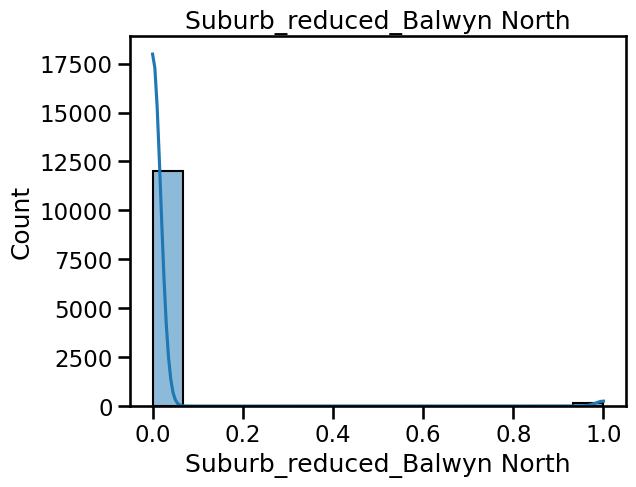

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


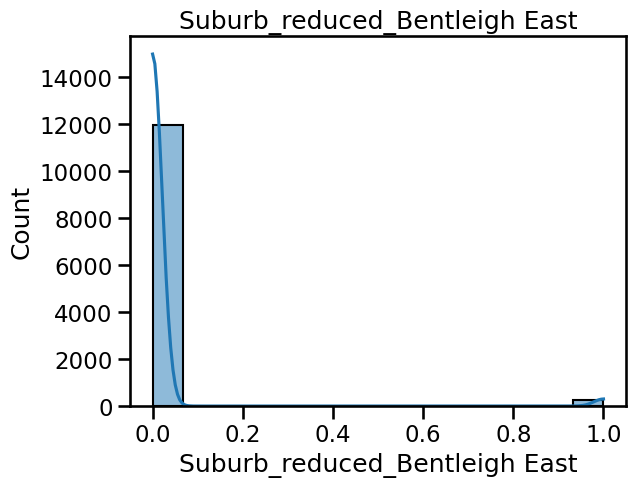

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


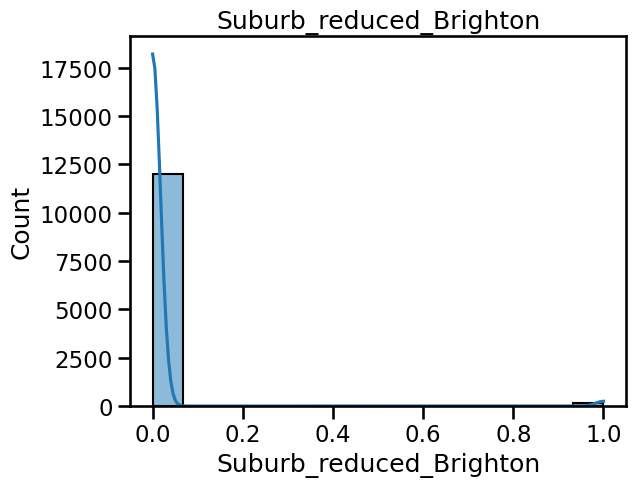

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


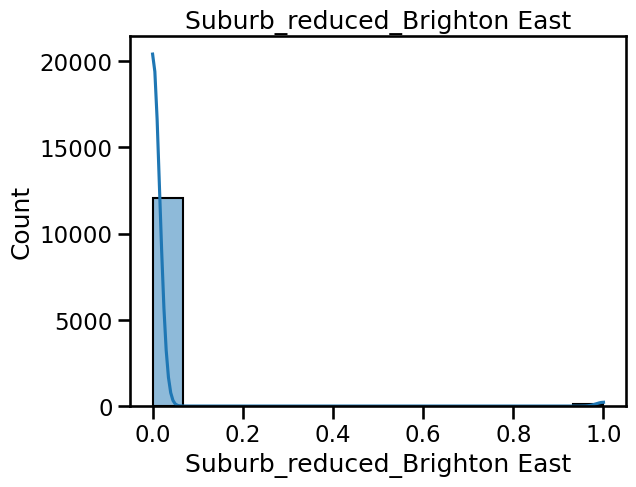

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


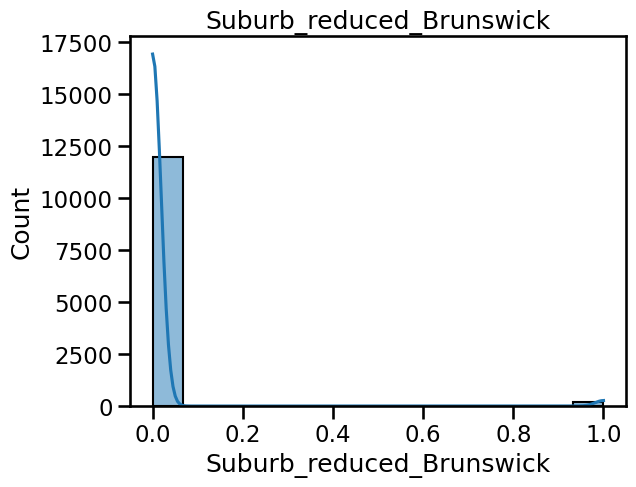

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


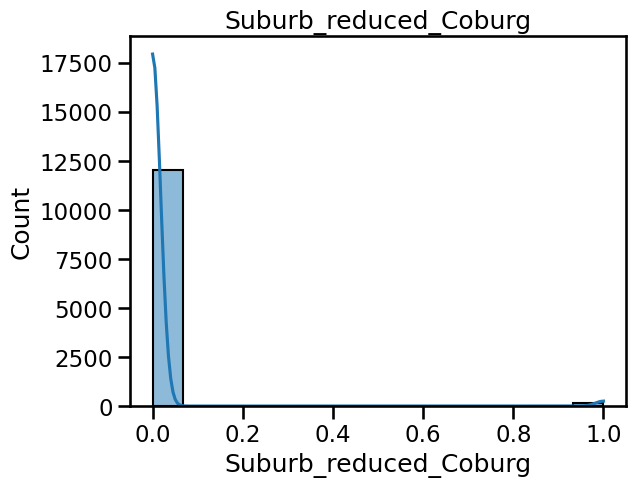

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


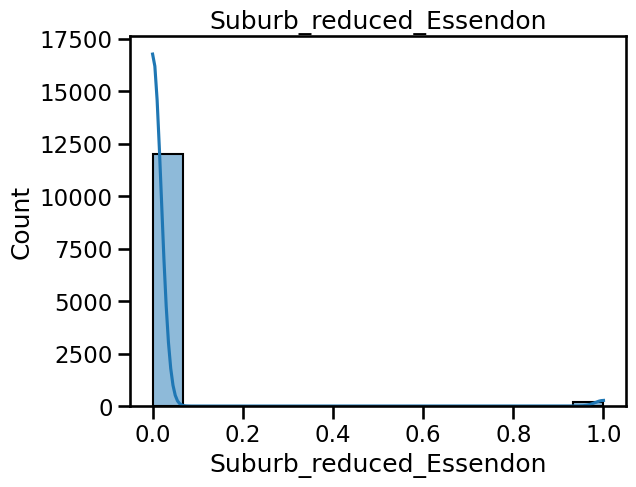

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


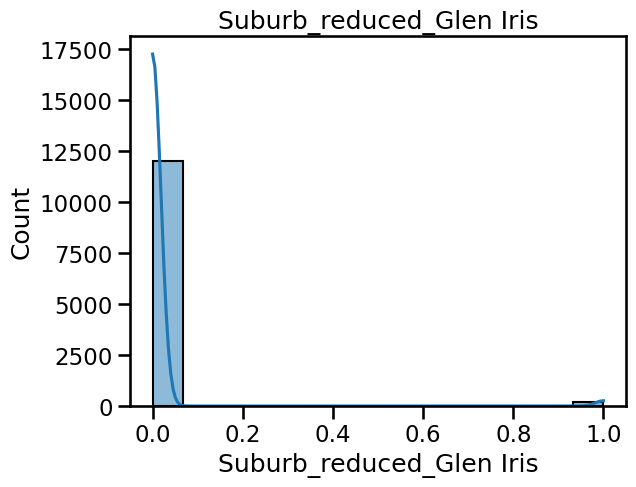

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


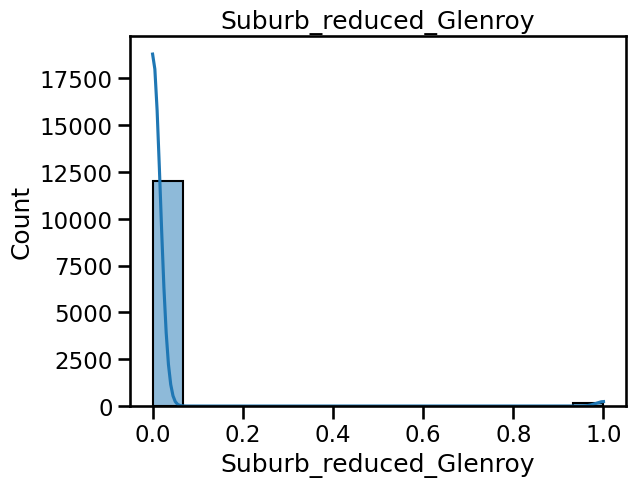

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


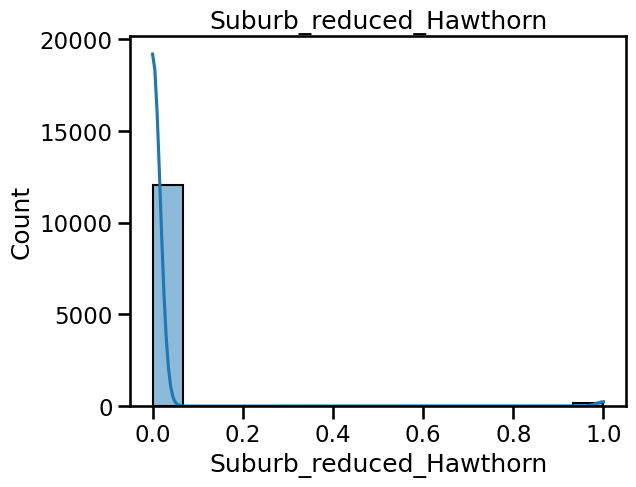

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


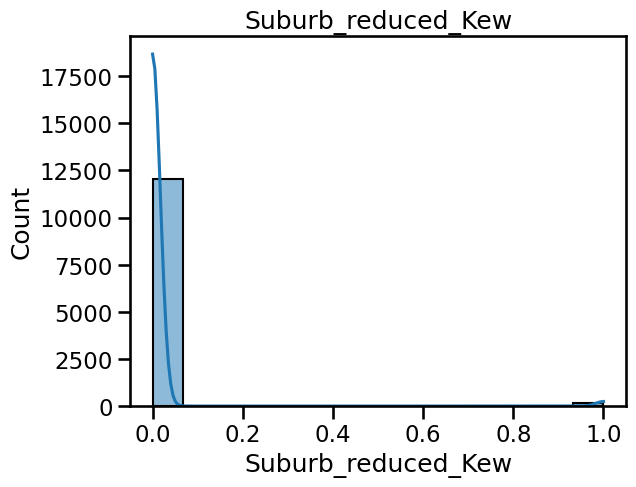

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


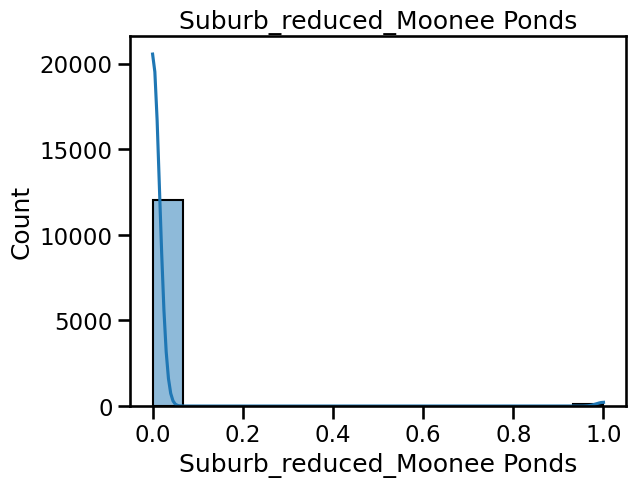

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


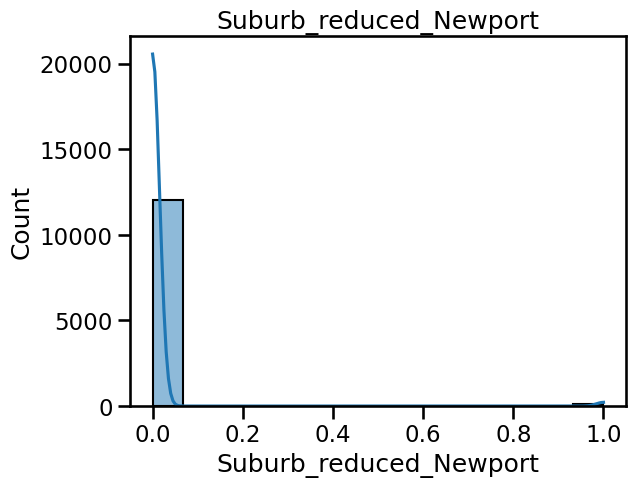

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


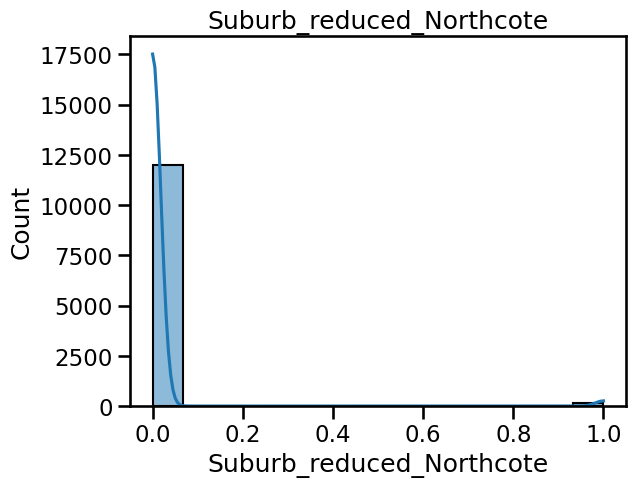

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


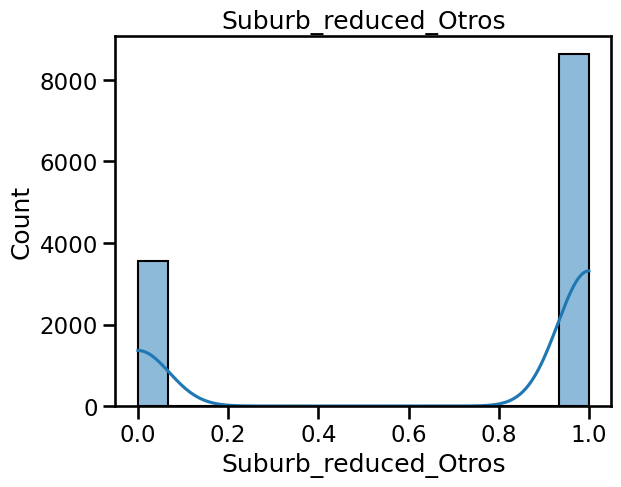

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


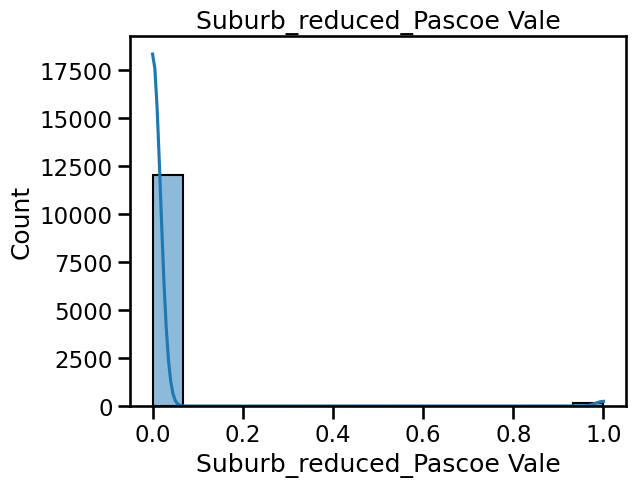

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


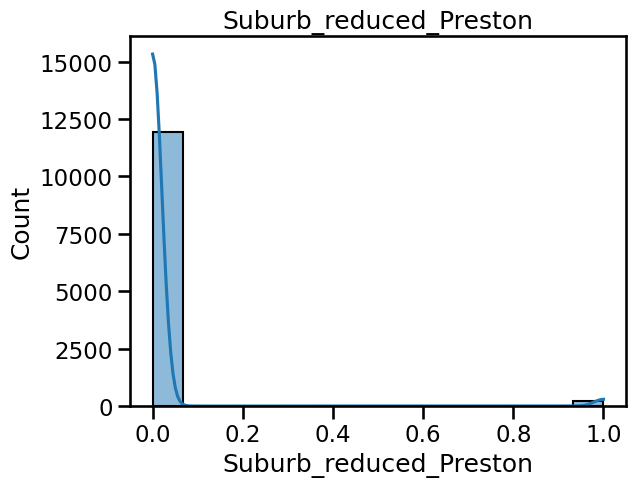

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


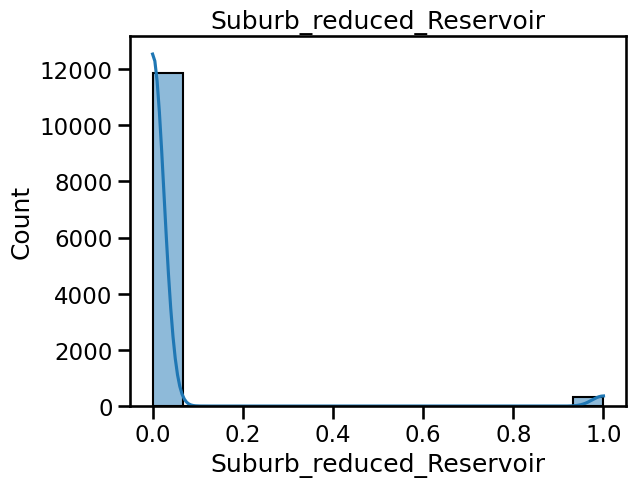

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


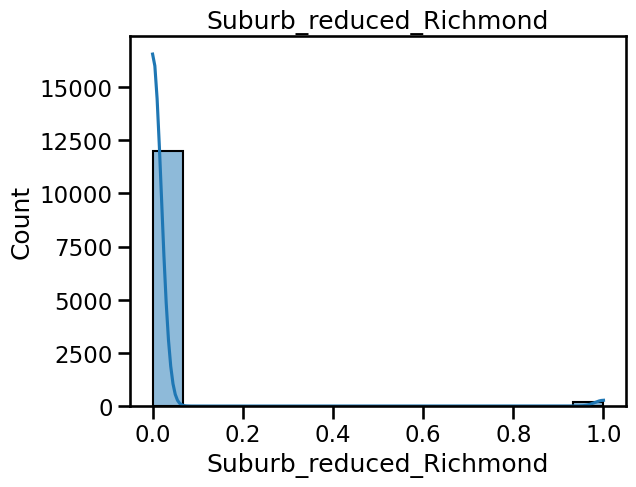

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


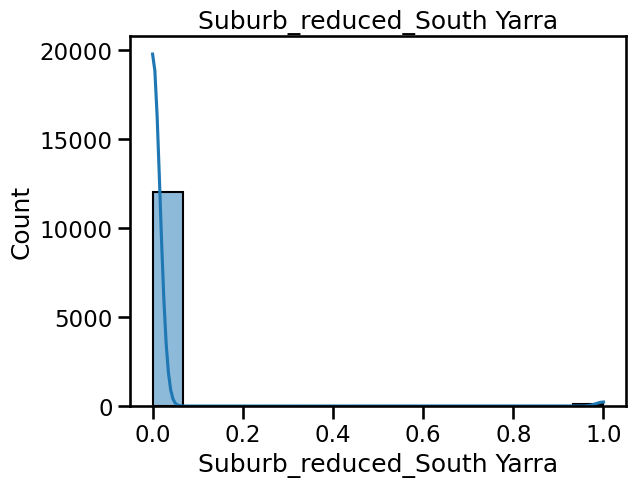

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


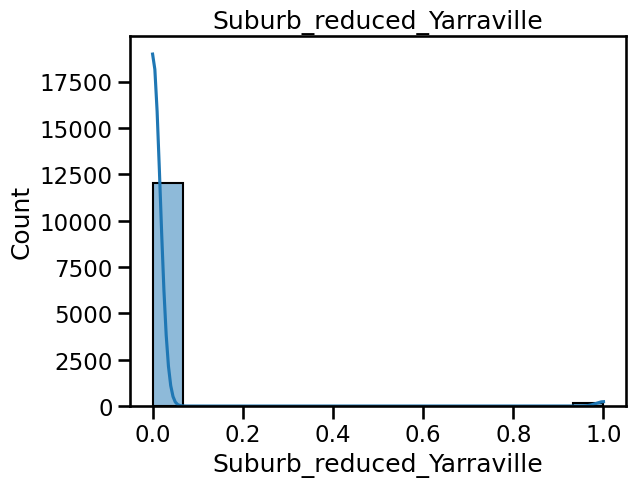

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


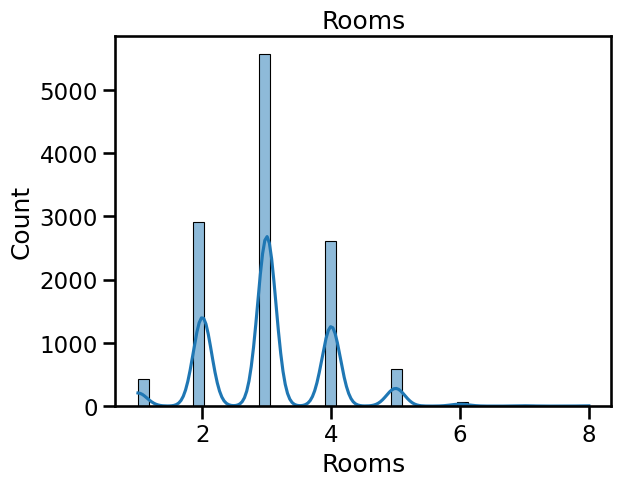

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


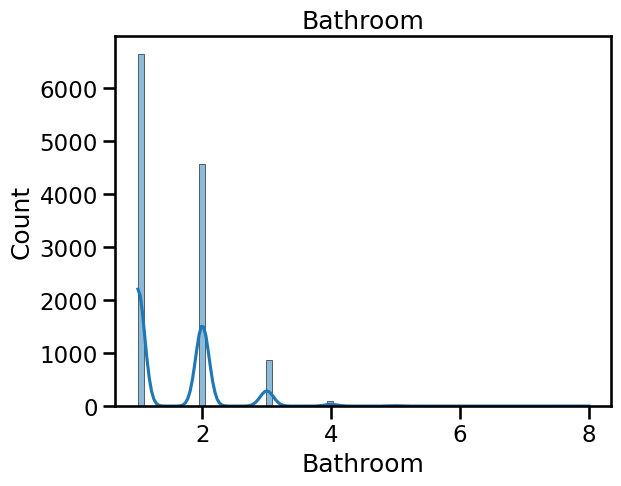

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


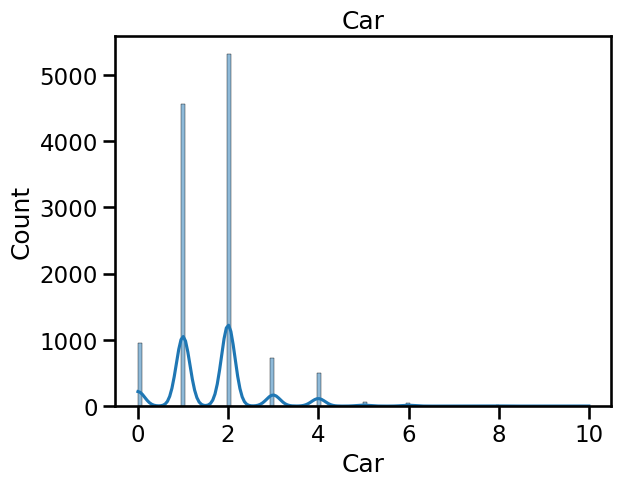

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


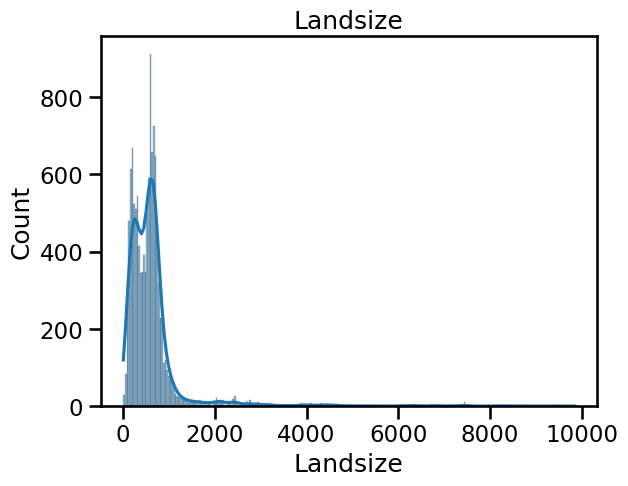

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


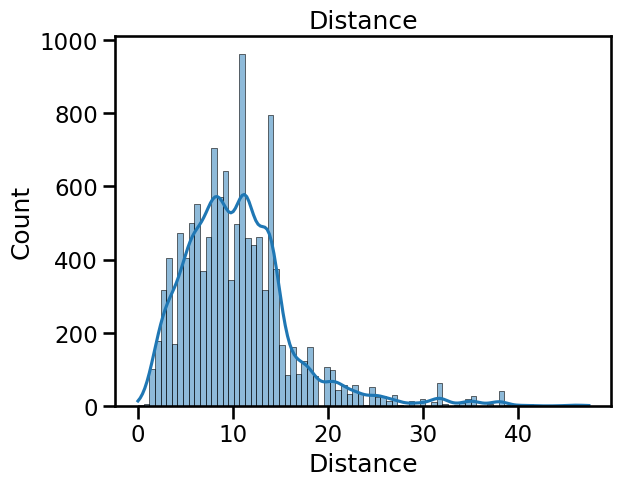

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


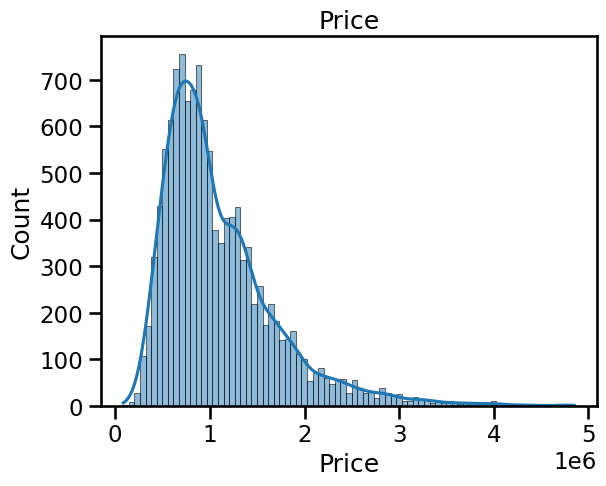

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


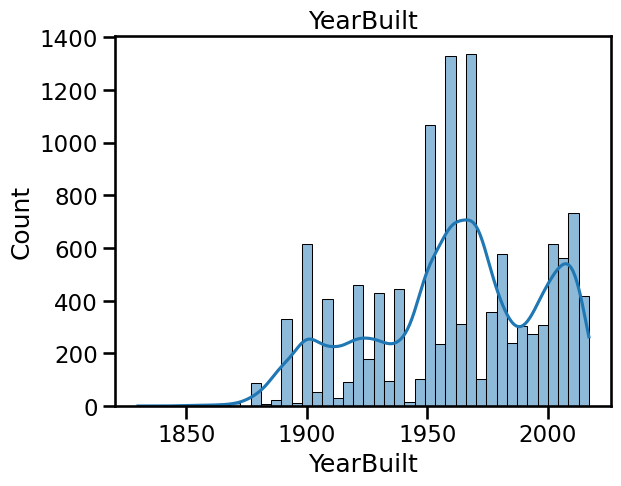

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


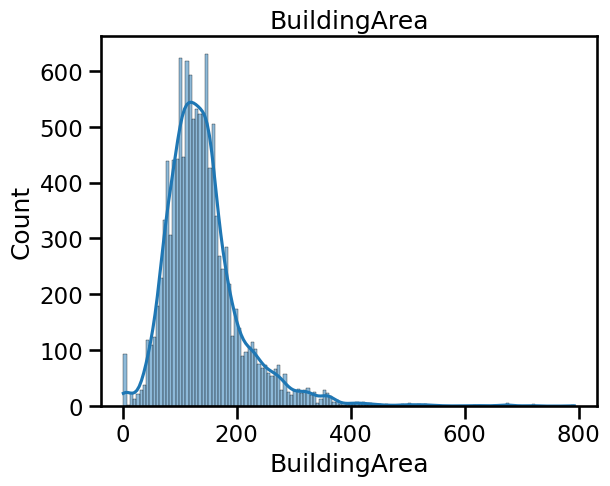

In [85]:
numerical_columns = ["Rooms", "Bathroom", "Car", "Landsize", "Distance", "Price", "BuildingArea", "YearBuilt", "Distance"]

for col in imputed_df.columns:
    if col:
        sns.histplot(imputed_df[col], kde=True)
        plt.title(col)
        plt.xlabel(col)
        plt.show()

Dado que tengo datos que no tienen distro normal, y tengo variables con outliers, uso RobustScaler:

In [86]:
# Estandarizo los datos con RobustScaler
scaler = RobustScaler()

melb_data_to_pca = imputed_df[numerical_columns]

# Fit and transform the data
robust_scaled_data_melb = scaler.fit_transform(melb_data_to_pca)

In [87]:
n = min(20, melb_data_to_pca.shape[1])

pca = PCA(n_components=n)
pca_dummy_features = pca.fit_transform(robust_scaled_data_melb)
pca_dummy_features_to_add = pca_dummy_features[:,[0,1]]
pca_data_melb = np.hstack([robust_scaled_data_melb, pca_dummy_features_to_add])

# Rearmo el dataframe
numerical_columns = ["Rooms", "Bathroom", "Car", "Landsize", "Distance", "Price", "BuildingArea", "YearBuilt", "Distance"]
for i in range(1,3):
    numerical_columns.extend([f'pca_{i}'])
pca_processed_melb_df = pd.DataFrame(data=pca_data_melb, columns=numerical_columns)
for col in imputed_df:
    if not col in numerical_columns:
        pca_processed_melb_df[col] = imputed_df[col]

pca_processed_melb_df.head()

,Rooms,Bathroom,Car,Landsize,Distance,Price,BuildingArea,YearBuilt,Distance,pca_1,...,Suburb_reduced_Moonee Ponds,Suburb_reduced_Newport,Suburb_reduced_Northcote,Suburb_reduced_Otros,Suburb_reduced_Pascoe Vale,Suburb_reduced_Preston,Suburb_reduced_Reservoir,Suburb_reduced_Richmond,Suburb_reduced_South Yarra,Suburb_reduced_Yarraville
0,-0.5,0.0,-1.0,-0.819712,-1.072464,0.801471,-0.575758,-1.5,-1.072464,-1.022589,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.5,0.0,-2.0,-0.930288,-1.072464,0.147059,-0.787879,-1.3,-1.072464,-1.117320,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,-1.0,-1.079327,-1.072464,-0.125000,-0.090909,0.5,-1.072464,-1.146663,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.5,0.0,-2.0,-0.870192,-1.072464,0.008824,-0.833333,-1.3,-1.072464,-1.050273,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,-2.0,-0.716346,-1.072464,1.383824,1.196970,-1.1,-1.072464,-1.047742,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [88]:
# Guardo dataframe en un archivo
pca_processed_melb_df.to_csv("./pca_processed_melb_df.csv")

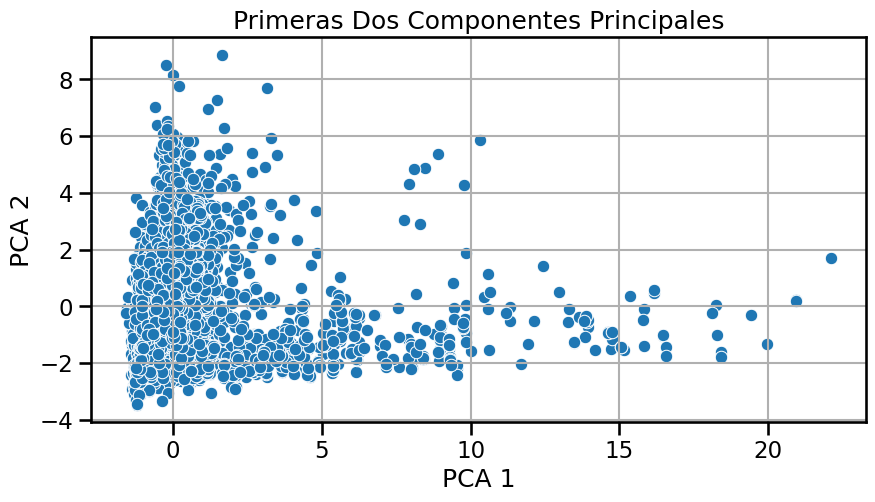

In [89]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=pca_processed_melb_df, x='pca_1', y='pca_2')
plt.grid()
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.title("Primeras Dos Componentes Principales")
plt.show()

## Ejercicio 4: Documentación

En un documento `.pdf` o `.md` realizar un reporte de las operaciones que realizaron para obtener el conjunto de datos final. Se debe incluir:
  1. Criterios de exclusión (o inclusión) de filas y de imputación de datos faltantes
  2. Interpretación de las columnas presentes
  3. Todas las transofrmaciones realizadas
  4. Análisis breve de lo observado mediante PCA.

Este documento es de uso técnico exclusivamente, y su objetivo es permitir que otres desarrolladores puedan reproducir los mismos pasos y obtener el mismo resultado. Debe ser detallado pero consiso. Por ejemplo:

```
  ## Criterios de exclusión de ejemplos
  1. Registro con 10 habitaciones (Rooms  = 10)
  2. Registros con Bathroom > Rooms
  3. Registro con Landsize mayor a 10.000
  4. Registros con BuildingArea mayor que Landsize
  5. Registros con años de construcción anteriores a 1800
  6. Registros con precios mayores a 5.000.000.

  ## Características seleccionadas
  ### Características categóricas
  1. Type: tipo de propiedad. 3 valores posibles
  2. Suburb: Suburbio donde se encuentra la propiedad.
  Todas las características categóricas fueron codificadas con un
  método OneHotEncoding utilizando como máximo sus 20 valores más
  frecuentes.
  
  ### Características numéricas
  1. Rooms: Cantidad de habitaciones
  2. Bathroom: Número de baños en la propiedad
  3. Car: Número de espacios disponibles para estacionamiento de automóviles.
  4. Landsize: Tamaño del terreno (en metros cuadrados)
  5. Distance: Distancia al centro de la ciudad
  6. Price: Precio de venta
  7. BuildingArea: Área construida de la propiedad (en metros cuadrados) -tamaño habitable o edificado de la casa-
  8. YearBuilt: Año de construcción de la propiedad
  9. airbnb_mean_price: Se agrega el precio promedio diario de
     publicaciones de la plataforma AirBnB en el mismo código
     postal. [Link al repositorio con datos externos].

  ### Transformaciones:
  1. Las columnas YearBuilt y BuildingArea fueron imputadas utilizando un algoritmo de imputación múltiple con predictor KNN con k=1, habiendo sido previamente escaladas en el intérvalo [-1,1]. Luego fueron restablecidas a su rango original antes de ejecutar la siguiente transformación.
  2. Todas las características numéricas fueron estandarizadas restando la media y escalando los datos de acuerdo al intérvalo intercuartil (rango entre el primer y tercer cuartil).

  ### Datos aumentados
  1. Se agregan las 2 primeras columnas obtenidas a través del
     método de PCA, aplicado sobre el conjunto de datos
     totalmente procesado.
```
